## Типы кодирования в Python

Если признак содержит в себе несколько категорий, то мы можем закодировать его, чтобы модель имела возможность обучиться на данных.

> Порядковое кодирование __(Ordinal Encoding)__ используется когда признак описан некоторыми категориями, отражающими одно явление и его степень проявления: (высокий - средний - низкий), (отлично, хорошо, удовлетворительно, плохо, ужасно), (полностью согласен, частично согласен, скорее согласен, скорее не согласен, совсем не согласен)

Если признак номинальные, то можно использовать как двоичное так и однократное кодирование, пример (Россия, Армения, Белоруссия, Китай, США, Турция)

> Двоичное кодирование __(Binary Encoding)__ - позволяет кодировать признак, если в нем более 15 категорий.

> Однократное кодирование __(OneHot Encoding)__ - позволяет кодировать признак, если в нем менее 15 категорий.

### Ordinal Encoding
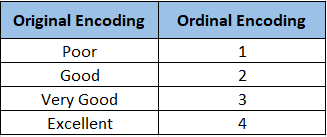

При порядковом кодировании количество столбцов и количество категорий не изменяется

### Binary Encoding
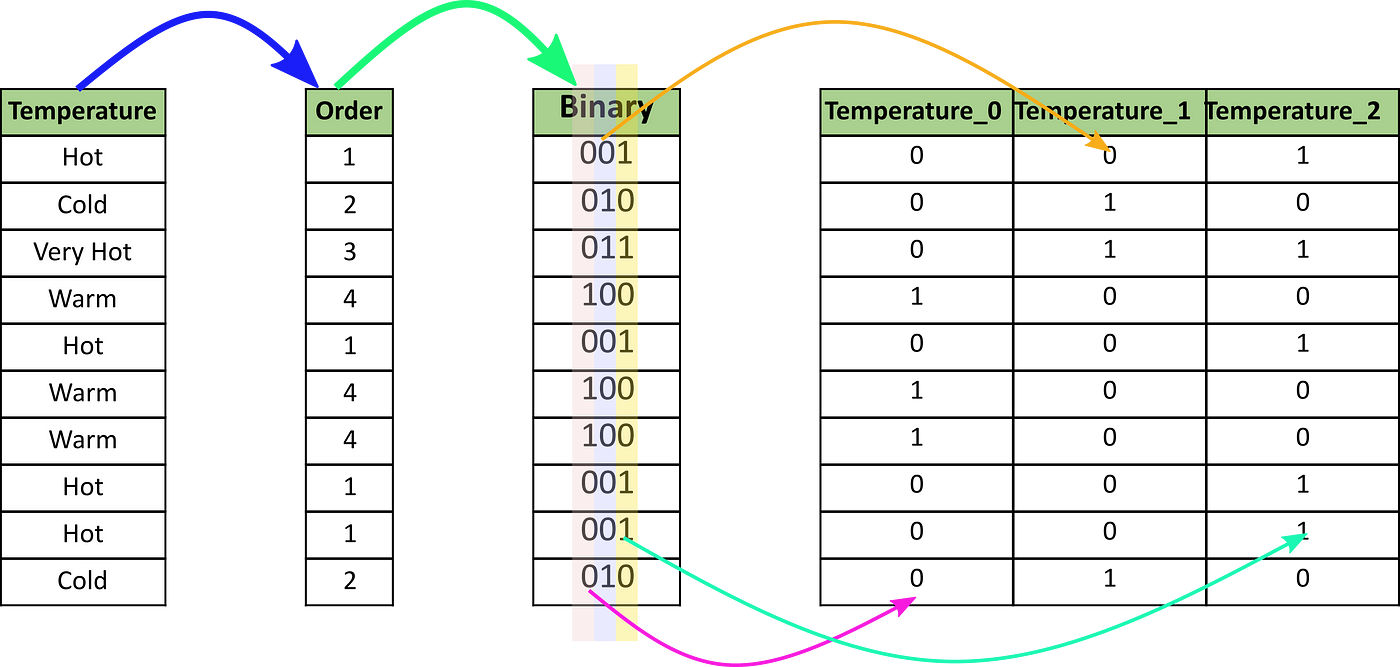

При бинарном кодировании признаки не являются отражением какой-либо степени некоторого явления, следовательно порядковое кодирование способно запутать модель, ввиду того что порядковый номер может начать восприниматься как отражение степени значения в категория.

При бинарном кодировании количество столбцов увеличивается

### OneHot Encoding

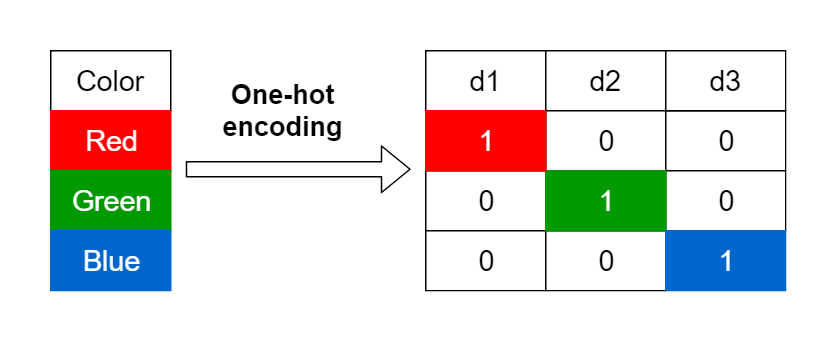

При "горячем" кодировании из столбца с категориями создается n новых столбцов, где n - это число категорий из изначального столбца. Каждый из новых столбцов отражает определенную категорию признака. Если признак соответсвует определенной категории, то в столбце с ним будет стоят 1, иначе 0

### Кодирование в Python

In [ ]:
# скачиваем библиотеку scikit-learn
!pip install scikit-learn

Порядковое кодирование - LabelEncoder

Двоичное кодирование - LabelBinarizer

Однократное кодирование - OneHotEncoder

In [1]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OneHotEncoder

```python
# инциализация кодировщика
encoder = LabelEncoder()

# обучаем кодировщик
encoder.fit(data['Признак'])

# применяем кодирование к признаку
encoder.transform(data['Признак'])
```

In [3]:
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv('/content/drive/MyDrive/Foxford/Андрей/preprocessed_titanic.csv')
data.head()

,Survived,Pclass,Age,Fare,Sex,Embarked
0,0,3 класс,22.0,7.2500,male,S
1,1,1 класс,38.0,71.2833,female,C
2,1,3 класс,26.0,7.9250,female,S
3,1,1 класс,35.0,53.1000,female,S
4,0,3 класс,35.0,8.0500,male,S


In [5]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

encoder.fit(data['Embarked'])

encode_embarked = encoder.transform(data['Embarked'])

In [6]:
data['Emabread_encode'] = encode_embarked
data.head()

,Survived,Pclass,Age,Fare,Sex,Embarked,Emabread_encode
0,0,3 класс,22.0,7.2500,male,S,2
1,1,1 класс,38.0,71.2833,female,C,0
2,1,3 класс,26.0,7.9250,female,S,2
3,1,1 класс,35.0,53.1000,female,S,2
4,0,3 класс,35.0,8.0500,male,S,2


In [7]:
data = data.drop(['Embarked'], axis=1)
data.head()

,Survived,Pclass,Age,Fare,Sex,Emabread_encode
0,0,3 класс,22.0,7.2500,male,2
1,1,1 класс,38.0,71.2833,female,0
2,1,3 класс,26.0,7.9250,female,2
3,1,1 класс,35.0,53.1000,female,2
4,0,3 класс,35.0,8.0500,male,2


ДЗ на 19.07

1. Провести пордяковое кодирование признака Pclass и посторить визуализации частотности признаков до и после кодирования.
2. Закодировать признак Age с бинарным кодированием (в случае неудачи, можешь попробовать однократное кодирование)
3. Признак Sex закодировать с помощью бинарного кодирования

In [12]:
# инциализация кодировщика
encoder = LabelBinarizer()

data['Age'] = data['Age'].astype('int64')

# обучаем кодировщик
encoder.fit(data['Age'])

# применяем кодирование к признаку
result = encoder.transform(data['Age'])


In [16]:
display(len(result[0]))

71

In [18]:
data['Age'].unique()

array([22, 38, 26, 35, 28, 54,  2, 27, 14,  4, 58, 20, 39, 55, 31, 34, 15,
        8, 19, 40, 66, 42, 21, 18,  3,  7, 49, 29, 65,  5, 11, 45, 17, 32,
       16, 25,  0, 30, 33, 23, 24, 46, 59, 71, 37, 47, 70, 12,  9, 36, 51,
       44,  1, 61, 56, 50, 62, 41, 52, 63, 43, 60, 10, 64, 13, 48, 53, 57,
       80,  6, 74])

In [23]:
print(result[0].tolist().index(1))

22


In [24]:
data['Age'].unique().tolist()[22]

21

In [25]:
data['Age'].iloc[0]

22

In [26]:
data['Sex'].head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [35]:
# инциализация кодировщика
encoder = OneHotEncoder()

data['Sex'] = data['Sex'].replace('male', 1)
data['Sex'] = data['Sex'].replace('female', -1)

# обучаем кодировщик
encoder.fit(data['Sex'])

# применяем кодирование к признаку
result = encoder.transform(data['Sex'])

ValueError: Expected 2D array, got 1D array instead:
array=[ 1 -1 -1 -1  1  1  1  1 -1 -1 -1 -1  1  1 -1 -1  1  1 -1 -1  1  1 -1  1
 -1 -1  1  1 -1  1  1 -1 -1  1  1  1  1  1 -1 -1 -1 -1  1 -1 -1  1  1 -1
  1 -1  1  1 -1 -1  1  1 -1  1 -1  1  1 -1  1  1  1  1 -1  1 -1  1  1 -1
  1  1  1  1  1  1  1 -1  1  1 -1  1 -1 -1  1  1 -1  1  1  1  1  1  1  1
  1  1 -1  1 -1  1  1  1  1  1 -1  1  1 -1  1 -1  1 -1 -1  1  1  1  1 -1
  1  1  1 -1  1  1  1  1 -1  1  1  1 -1 -1  1  1 -1  1  1  1 -1 -1 -1  1
  1  1  1 -1  1  1  1 -1  1  1  1  1 -1  1  1  1  1 -1  1  1  1  1 -1 -1
  1  1  1  1 -1  1  1  1  1 -1  1  1 -1  1  1  1 -1  1 -1  1  1  1 -1  1
 -1  1 -1 -1  1  1 -1 -1  1  1  1  1  1 -1  1  1 -1  1  1 -1  1  1  1 -1
 -1  1 -1  1  1  1  1  1  1  1  1  1  1 -1 -1  1  1 -1  1 -1  1 -1  1  1
 -1 -1  1  1  1  1 -1 -1  1  1  1 -1  1  1 -1 -1 -1 -1 -1 -1  1  1  1  1
 -1  1  1  1 -1 -1  1  1 -1  1 -1 -1 -1  1  1 -1  1  1  1  1  1  1  1  1
  1 -1 -1 -1  1 -1  1  1  1 -1  1 -1 -1  1  1 -1  1  1 -1 -1  1 -1 -1 -1
 -1  1  1 -1 -1  1 -1 -1  1  1 -1 -1  1 -1  1 -1 -1 -1 -1  1  1  1 -1  1
  1 -1  1  1  1 -1  1  1  1 -1 -1 -1  1  1  1  1  1  1  1  1 -1 -1 -1 -1
  1  1 -1  1  1  1 -1 -1 -1 -1  1  1  1  1 -1 -1 -1  1  1  1 -1 -1  1 -1
  1  1  1 -1  1 -1  1  1  1 -1 -1  1 -1  1  1 -1  1  1 -1  1 -1  1  1  1
  1 -1  1  1 -1  1  1 -1 -1 -1  1 -1  1  1  1 -1  1  1 -1 -1  1  1  1 -1
 -1  1  1 -1 -1 -1  1  1 -1  1  1 -1  1  1 -1  1 -1  1  1  1  1  1  1  1
  1 -1 -1  1  1  1  1  1  1  1  1  1  1 -1  1  1 -1 -1 -1  1  1  1  1 -1
  1  1  1 -1  1 -1 -1  1  1  1  1  1  1  1  1  1 -1  1 -1  1  1 -1 -1 -1
 -1  1 -1  1  1  1  1  1  1 -1  1  1 -1  1 -1  1 -1  1  1 -1  1  1 -1  1
  1  1 -1  1  1 -1 -1 -1  1 -1  1 -1 -1 -1 -1  1  1  1 -1  1  1  1  1  1
  1  1 -1  1 -1  1 -1 -1  1  1  1  1 -1  1  1 -1  1  1  1 -1  1 -1  1  1
 -1 -1 -1  1 -1 -1  1  1  1 -1  1  1  1  1  1 -1  1 -1  1  1 -1  1  1  1
 -1  1  1  1  1  1  1  1 -1 -1 -1  1 -1  1  1 -1  1 -1 -1  1  1  1  1  1
  1  1  1 -1  1  1  1  1  1  1 -1 -1  1  1 -1  1  1 -1 -1  1 -1  1  1  1
  1 -1  1 -1  1 -1 -1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1
  1  1  1  1  1 -1 -1  1 -1  1  1  1  1  1  1  1  1 -1  1 -1  1  1  1  1
  1 -1  1  1 -1  1 -1  1  1  1 -1  1 -1  1 -1  1  1  1  1  1 -1 -1  1  1
 -1  1  1  1  1  1 -1 -1  1 -1 -1  1  1  1  1  1 -1  1  1  1  1  1 -1  1
  1  1  1 -1  1  1 -1  1  1  1 -1  1  1  1  1 -1  1  1  1 -1  1 -1  1 -1
  1  1  1  1 -1  1 -1  1  1 -1  1 -1 -1 -1  1  1  1  1 -1  1  1  1  1  1
 -1  1  1  1 -1 -1  1 -1  1 -1  1  1  1  1  1 -1  1 -1  1  1  1 -1  1  1
 -1  1  1  1 -1  1  1 -1  1  1  1  1  1 -1 -1  1  1  1  1 -1  1  1  1  1
  1  1 -1  1  1  1  1  1  1 -1  1  1 -1 -1 -1 -1 -1  1 -1  1  1  1 -1 -1
  1 -1 -1  1  1  1  1 -1  1  1 -1 -1  1  1  1 -1 -1  1 -1  1  1 -1  1 -1
 -1  1  1].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.